# [Hw06] Clustering
Jeong Ji Hoon 2016010980

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Load Iris Dataset

In [2]:
## Load Iris Data set
NUM_FEATURE = 4 # Number of Features in each sample

#Dataset Download
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
dataset = df.values

#Iris name to integer codes
iris_names = np.unique(dataset[:,NUM_FEATURE])
for i,name in enumerate(iris_names):
    dataset[np.where(dataset[:,NUM_FEATURE] == name),NUM_FEATURE] = i

X = dataset[:,:NUM_FEATURE].astype(float)
y = dataset[:,NUM_FEATURE].astype(int)

featureLabels = ['sepal length', 'sepal width', 'petal length', 'petal width']

# 2. K-means

## 2a & b. Implement K-mean algorithm & k-means++ initialization method

In [3]:

# Class definition
class KMeans_my(object):
    # KMean Algorithm을 구현.
    def __init__(self, n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0):
        self.n_clusters = n_clusters
        self.init = init
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        # 주어진 조건으로 fit 만 진행하는 함수.

        # 코드 간결성을 위해 변수 지정.
        datasize = np.shape(X)[0]
        datadimension = np.shape(X)[1]

        # 총 n_init 번 돌려야 함.
        centroidset = np.zeros([self.n_init,self.n_clusters,datadimension])
        errorscore = np.zeros(self.n_init)
        for iterations in range(self.n_init):
            # initial centroid 지정
            centroid = self.initialize(X)
            meandistance = 0
            for run in range(self.max_iter):
                # 현재 centroid를 기반으로 모든 sample 들의 euclidean distance를 구함.
                distances = np.zeros([datasize,self.n_clusters])
                for i in range(self.n_clusters):
                    diff = np.tile(centroid[i,:],[datasize,1]) - X
                    distances[:,i] = np.sum(diff**2,1)**0.5

                # 이렇게 구한 euclidean distance를 기반으로 가장 가까운 centroid 라벨을 부여.
                labels = np.argmin(distances, 1)

                # meandistance가 tolerance보다 작으면 관두고
                meandistance = np.mean(np.min(distances,1))
                if  meandistance< self.tol:
                    break
                # 여전히 크면 새로운 라벨을 기반으로 새로운 centroid를 선택함.
                else:
                    for i in range(self.n_clusters):
                        centroid[i,:] = np.mean(X[labels==i,:],0)
            # 다 돌린뒤 centroid 와 score를 저장.
            centroidset[iterations,:,:] = centroid
            errorscore[iterations] = meandistance
        # 가장 성능이 좋았던 centroid를 선택.
        self.centroid = centroidset[np.argmin(errorscore),:]
        return self

    def fit_predict(self, X):
        # 주어진 조건으로 fit과 함께 해당하는 sample의 label을 출력하는 함수.

        # do fit
        self.fit(X)

        # variables
        n_clusters = self.n_clusters
        centroid = self.centroid
        datasize = np.shape(X)[0]

        # 모든 sample 들의 euclidean distance를 구함.
        distances = np.zeros([datasize, n_clusters])
        for i in range(n_clusters):
            diff = np.tile(centroid[i, :], [datasize, 1]) - X
            distances[:, i] = np.sum(diff ** 2, 1) ** 0.5

        # distances를 기반으로 가장 가까운 centroid 라벨을 부여.
        labels = np.argmin(distances, 1)
        return labels

    def initialize(self,X):
        # 초기 centroid를 지정하는 함수.

        #rgen 여기에서 초기화.
        rgen = np.random.RandomState(self.random_state)

        # 코드 간결성을 위해 변수 지정
        datasize = np.shape(X)[0]
        datadimension = np.shape(X)[1]

        # 걍 아무거나 랜덤으로 정함.
        if self.init == 'random':
            centroid = X[rgen.permutation(datasize)[0:self.n_clusters], :]
        # k-mean 플플 알고리즘 적용.
        elif self.init == 'k-means++':
            # centroid 값 넣을 변수 생성
            centroid = np.zeros([self.n_clusters,datadimension])
            # 첫 centroid는 아무거나 정함
            centroidindex = rgen.permutation(datasize)[0]
            centroid[0,:] = X[centroidindex, :]
            # 선택한 sample은 X에서 제외.
            newX = np.delete(X,centroidindex,0)

            # 나머지 centroid를 정하는 알고리즘 시작
            for i in range(self.n_clusters - 1):
                # 모든 sample 들의 euclidean distance를 구함.
                distances = np.zeros([datasize -1 -i, i + 1])
                for j in range(i+1):
                    diff = np.tile(centroid[j, :], [datasize -1 -i, 1]) - newX
                    distances[:, j] = np.sum(diff ** 2, 1) ** 0.5

                # 이 distance 중에서 최소 값을 기준으로 다음 centroid로 뽑힐 확률을 계산.
                probabilities = np.min(distances, 1) / np.sum(np.min(distances,1))
                # [0,1] 범위를 distance 값을 사용해서 나눔.
                randomrange = np.cumsum(probabilities)
                # rand(1) 값보다 처음으로 큰 randomrange 값을 index로 고름.
                newindex = np.argmax(randomrange > rgen.rand(1))

                # centroid 에 넣기.
                centroid[i+1,:] = newX[newindex,:]

                # 넣은 sample은 빼기
                newX = np.delete(newX,newindex,0)
        # 그런 옵션은 없습니다 고객님.
        else:
            raise ValueError(self.init + ' is not appropriate parameter!')
        return centroid

## 2c. Run k-means

### 2c-1. Cluster numbers

Text(0.5,1,'Cluster 5')

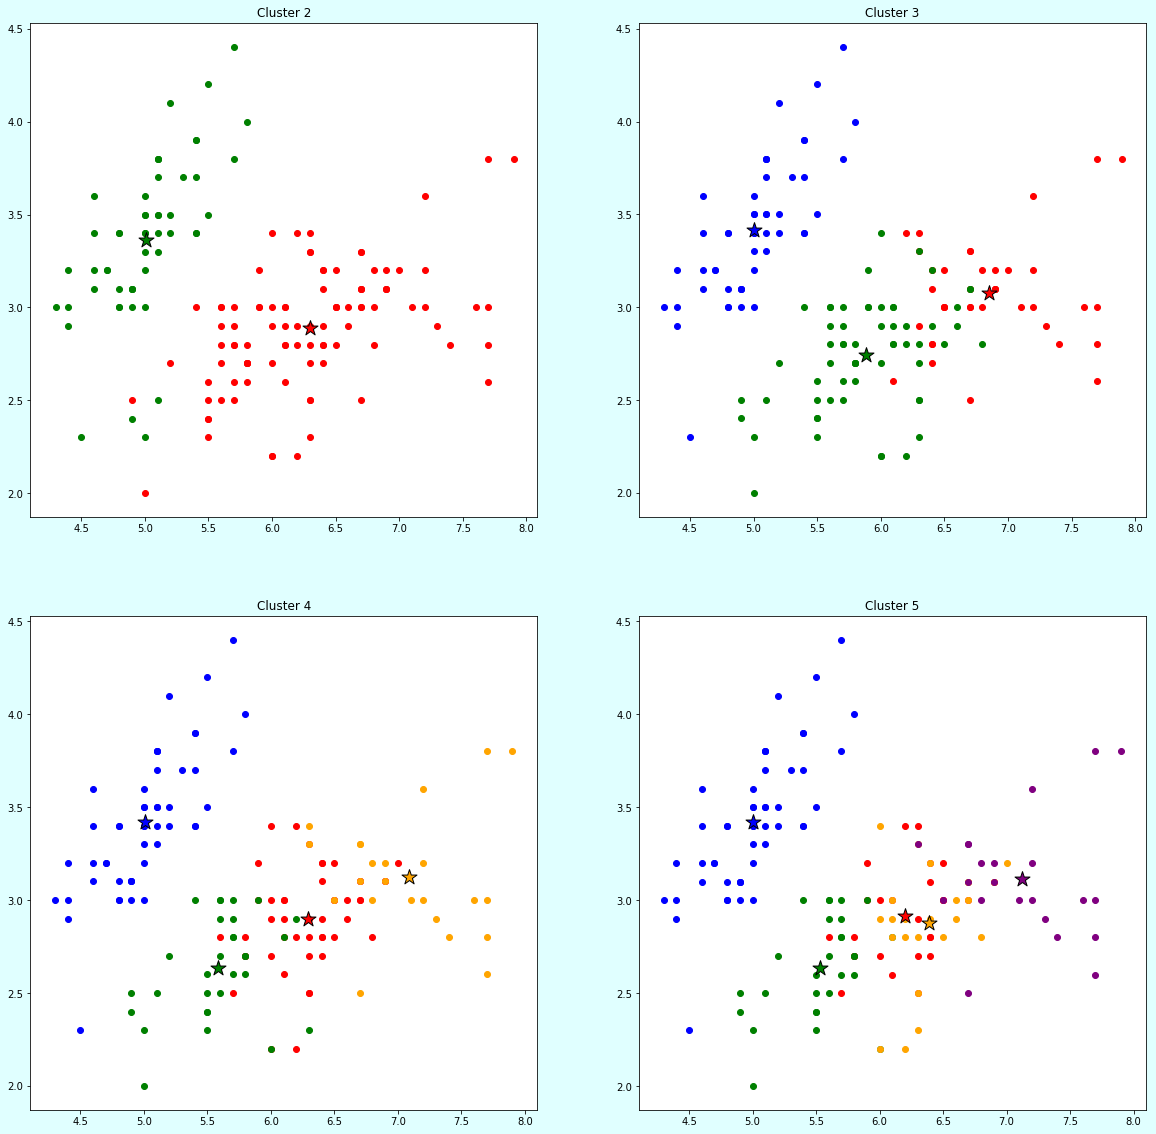

In [4]:
fig = plt.figure(figsize=(20,20))
fig.patch.set_facecolor('lightcyan')

ax = fig.subplots(2,2)

# Cluster 2
km = KMeans_my(n_clusters=2, init='k-means++',n_init=10, max_iter=100)
ys = km.fit_predict(X)
ax[0,0].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[0,0].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[0,0].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[0,0].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[0,0].set_title('Cluster 2')

# Cluster 3
km = KMeans_my(n_clusters=3, init='k-means++',n_init=10, max_iter=100)
ys = km.fit_predict(X)
ax[0,1].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[0,1].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[0,1].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[0,1].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[0,1].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[0,1].scatter(km.centroid[2,0],km.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[0,1].set_title('Cluster 3')

# Cluster 4
km = KMeans_my(n_clusters=4, init='k-means++',n_init=10, max_iter=100)
ys = km.fit_predict(X)
ax[1,0].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[1,0].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[1,0].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[1,0].scatter(X[ys==3,0],X[ys==3,1],c='orange')
ax[1,0].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[1,0].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[1,0].scatter(km.centroid[2,0],km.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[1,0].scatter(km.centroid[3,0],km.centroid[3,1],s=250,c='orange',marker='*',edgecolors='k')
ax[1,0].set_title('Cluster 4')

# Cluster 5
km = KMeans_my(n_clusters=5, init='k-means++',n_init=10, max_iter=100)
ys = km.fit_predict(X)
ax[1,1].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[1,1].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[1,1].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[1,1].scatter(X[ys==3,0],X[ys==3,1],c='orange')
ax[1,1].scatter(X[ys==4,0],X[ys==4,1],c='purple')
ax[1,1].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[1,1].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[1,1].scatter(km.centroid[2,0],km.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[1,1].scatter(km.centroid[3,0],km.centroid[3,1],s=250,c='orange',marker='*',edgecolors='k')
ax[1,1].scatter(km.centroid[4,0],km.centroid[4,1],s=250,c='purple',marker='*',edgecolors='k')
ax[1,1].set_title('Cluster 5')


### Observation
- 이 이후의 모든 plot은 iris data set의 첫 두 feature를 각각 x축, y축으로 사용해서 plotting 하였다.
- 원래 Class가 3인 것을 생각했을 때 Cluster의 수가 4 이상으로 늘어나면 제대로 clustering 하지 못하는 것을 관찰하였다.

### 2c-2. initialization

Text(0.5,1,'k-means++')

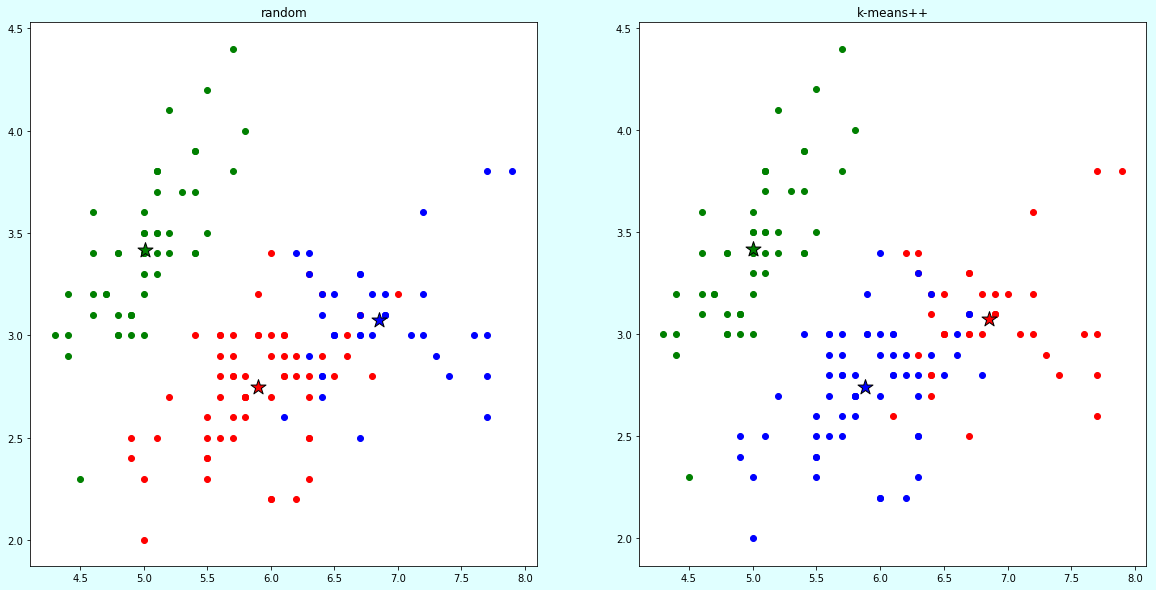

In [5]:
fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('lightcyan')

ax = fig.subplots(1,2)

# random
km = KMeans_my(n_clusters=3, init='random',n_init=10, max_iter=100, random_state=100)
ys = km.fit_predict(X)
ax[0].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[0].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[0].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[0].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[0].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[0].scatter(km.centroid[2,0],km.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[0].set_title('random')

# k-means++
km = KMeans_my(n_clusters=3, init='k-means++',n_init=10, max_iter=100, random_state=100)
ys = km.fit_predict(X)
ax[1].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[1].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[1].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[1].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[1].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[1].scatter(km.centroid[2,0],km.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[1].set_title('k-means++')


### Observation
- 다른 차원의 데이터에서는 어떻게 나왔는지 모르겠지만, 적어도 iris data의 첫 두 feature를 사용한 그래프에서는 두 방법 모두 비슷한 결과가 나타났다.
- 사실 random_state 값을 0으로 둔 채로 돌리면 두 경우 모두 같은 형태가 나와서 값을 조정해 서로 다른 형태로 clustering이 되도록 하였다.
- 비교적 iris data가 잘 clustering이 되고 iteration 수가 많아서 두 초기화 방법에서 비슷하게 잘 clustering이 되는 것이 아닌가 싶다.

### 2c-3. scikit-learn

Text(0.5,1,'Scikit-learn  K-mean')

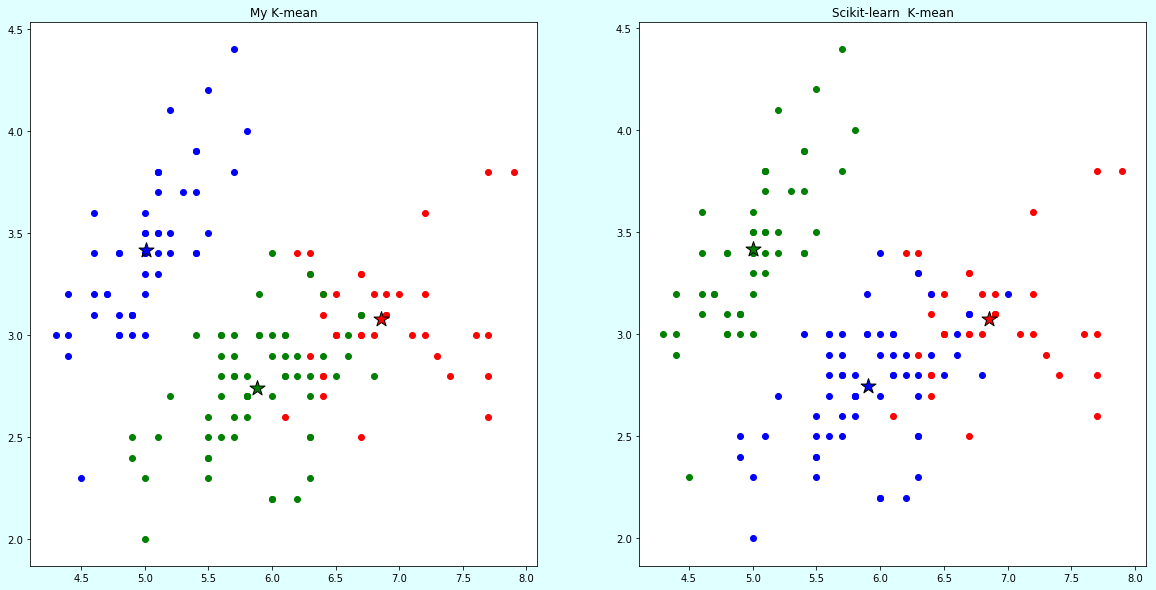

In [6]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('lightcyan')

ax = fig.subplots(1,2)

# my
km = KMeans_my(n_clusters=3, init='k-means++',n_init=10, max_iter=100)
ys = km.fit_predict(X)
ax[0].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[0].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[0].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[0].scatter(km.centroid[0,0],km.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[0].scatter(km.centroid[1,0],km.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[0].scatter(km.centroid[2,0],km.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[0].set_title('My K-mean')

# scikit-learn
km = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=100)
ys = km.fit_predict(X)
ax[1].scatter(X[ys==0,0],X[ys==0,1],c='r')
ax[1].scatter(X[ys==1,0],X[ys==1,1],c='g')
ax[1].scatter(X[ys==2,0],X[ys==2,1],c='b')
ax[1].scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[1].scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[1].scatter(km.cluster_centers_[2,0],km.cluster_centers_[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[1].set_title('Scikit-learn  K-mean')

### Observation
- 다른 차원의 데이터에서는 어떻게 나왔는지 모르겠지만, 직접 구현한 kmean과 scikit learn의 kmean의 결과는 유사하게 나타났다.
- 이 역시 비교적 iris data가 잘 clustering이 되고 iteration 수가 많아서 두 초기화 방법에서 비슷하게 잘 clustering이 되는 것이 아닌가 싶다.
- scikit-learn의 파란색과 초록색 결과를 보면 이 경우에는 본인이 구현한 kmean이 조금 더 잘 작동한게 아닌가 싶다.

# 3. Fuzzy C-means

## 3a. Implement the FCM

In [7]:

class FCM(object):
    # Fuzzy C KMean Algorithm을 구현.
    def __init__(self, n_clusters=3, fuzzy_coef_m = 2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0):
        self.n_clusters = n_clusters
        self.fuzzy_coef_m = fuzzy_coef_m
        self.init = init
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        # 주어진 조건으로 fit 만 진행하는 함수.

        # 코드 간결성을 위해 변수 지정.
        datasize = np.shape(X)[0]
        datadimension = np.shape(X)[1]

        # 총 n_init 번 돌려야 함.
        centroidset = np.zeros([self.n_init,self.n_clusters,datadimension])
        errorscore = np.zeros(self.n_init)
        for iterations in range(self.n_init):
            # initial centroid 지정
            centroid = self.initialize(X)
            meandistance = 0
            for run in range(self.max_iter):
                # 현재 centroid를 기반으로 모든 sample 들의 euclidean distance를 구함.
                distances = np.zeros([datasize,self.n_clusters])
                for i in range(self.n_clusters):
                    diff = np.tile(centroid[i,:],[datasize,1]) - X
                    distances[:,i] = np.sum(diff**2,1)**0.5

                # 이렇게 구한 euclidean distance를 기반으로 w 값을 구함.
                labels = np.zeros([datasize,self.n_clusters])
                # 처음 centroid로 뽑힌 sample들은 centroid와의 거리가 0이라 이후 계산에 문제가 생김. 작은 값을 더해줌.
                distances = distances + 0.000001 
                for i in range(self.n_clusters):
                    labels[:,i] = np.sum(
                        (np.tile(distances[:,i].reshape([-1,1]),[1,self.n_clusters]) / distances) ** (2/(self.fuzzy_coef_m-1))
                    ,1)

                labels = labels ** -1

                # meandistance가 tolerance보다 작으면 관두고
                meandistance = np.mean(np.mean(distances,1))
                if  meandistance< self.tol:
                    break
                # 여전히 크면 새로운 라벨을 기반으로 새로운 centroid를 선택함.
                else:
                    for i in range(self.n_clusters):
                        # centroid[i,:] = np.sum(
                        #     X * np.tile((labels[:,i]**self.fuzzy_coef_m).reshape([-1,1]),[1,datadimension])
                        #     )  / np.sum((labels[:,i]**self.fuzzy_coef_m))
                        centroid[i, :] = np.sum(X * np.tile((labels[:, i]).reshape([-1, 1]), [1, datadimension]),0) / np.sum((labels[:, i]))
            # 다 돌린뒤 centroid 와 score를 저장.
            centroidset[iterations,:,:] = centroid
            errorscore[iterations] = meandistance
        # 가장 성능이 좋았던 centroid를 선택.
        self.centroid = centroidset[np.argmin(errorscore),:]
        return self

    def fit_predict(self, X):
        # 주어진 조건으로 fit과 함께 해당하는 sample의 label을 출력하는 함수.

        # do fit
        self.fit(X)

        # variables
        n_clusters = self.n_clusters
        centroid = self.centroid
        datasize = np.shape(X)[0]

        # 현재 centroid를 기반으로 모든 sample 들의 euclidean distance를 구함.
        distances = np.zeros([datasize, self.n_clusters])
        for i in range(self.n_clusters):
            diff = np.tile(centroid[i, :], [datasize, 1]) - X
            distances[:, i] = np.sum(diff ** 2, 1) ** 0.5

            # 이렇게 구한 euclidean distance를 기반으로 w 값을 구함.
            labels = np.zeros([datasize, self.n_clusters])
            # 처음 centroid로 뽑힌 sample들은 centroid와의 거리가 0이라 이후 계산에 문제가 생김. 작은 값을 더해줌.
            distances = distances + 0.000001
            for i in range(self.n_clusters):
                labels[:, i] = np.sum(
                    (np.tile(distances[:, i].reshape([-1, 1]), [1, self.n_clusters]) / distances) ** (2 / (self.fuzzy_coef_m - 1))
                    , 1)

            labels = labels ** -1
        return labels

    def initialize(self,X):
        # 초기 centroid를 지정하는 함수.

        #rgen 여기에서 초기화.
        rgen = np.random.RandomState(self.random_state)

        # 코드 간결성을 위해 변수 지정
        datasize = np.shape(X)[0]
        datadimension = np.shape(X)[1]

        # 걍 아무거나 랜덤으로 정함.
        if self.init == 'random':
            centroid = X[rgen.permutation(datasize)[0:self.n_clusters], :]
        # k-mean 플플 알고리즘 적용.
        elif self.init == 'k-means++':
            # centroid 값 넣을 변수 생성
            centroid = np.zeros([self.n_clusters,datadimension])
            # 첫 centroid는 아무거나 정함
            centroidindex = rgen.permutation(datasize)[0]
            centroid[0,:] = X[centroidindex, :]
            # 선택한 sample은 X에서 제외.
            newX = np.delete(X,centroidindex,0)

            # 나머지 centroid를 정하는 알고리즘 시작
            for i in range(self.n_clusters - 1):
                # 모든 sample 들의 euclidean distance를 구함.
                distances = np.zeros([datasize -1 -i, i + 1])
                for j in range(i+1):
                    diff = np.tile(centroid[j, :], [datasize -1 -i, 1]) - newX
                    distances[:, j] = np.sum(diff ** 2, 1) ** 0.5

                # 이 distance 중에서 최소 값을 기준으로 다음 centroid로 뽑힐 확률을 계산.
                probabilities = np.min(distances, 1) / np.sum(np.min(distances,1))
                # [0,1] 범위를 distance 값을 사용해서 나눔.
                randomrange = np.cumsum(probabilities)
                # rand(1) 값보다 처음으로 큰 randomrange 값을 index로 고름.
                newindex = np.argmax(randomrange > rgen.rand(1))

                # centroid 에 넣기.
                centroid[i+1,:] = newX[newindex,:]

                # 넣은 sample은 빼기
                newX = np.delete(newX,newindex,0)
        # 그런 옵션은 없습니다 고객님.
        else:
            raise ValueError(self.init + ' is not appropriate parameter!')
        return centroid


## 3b. Cluster Number Variation

Text(0.5,1,'Cluster 5')

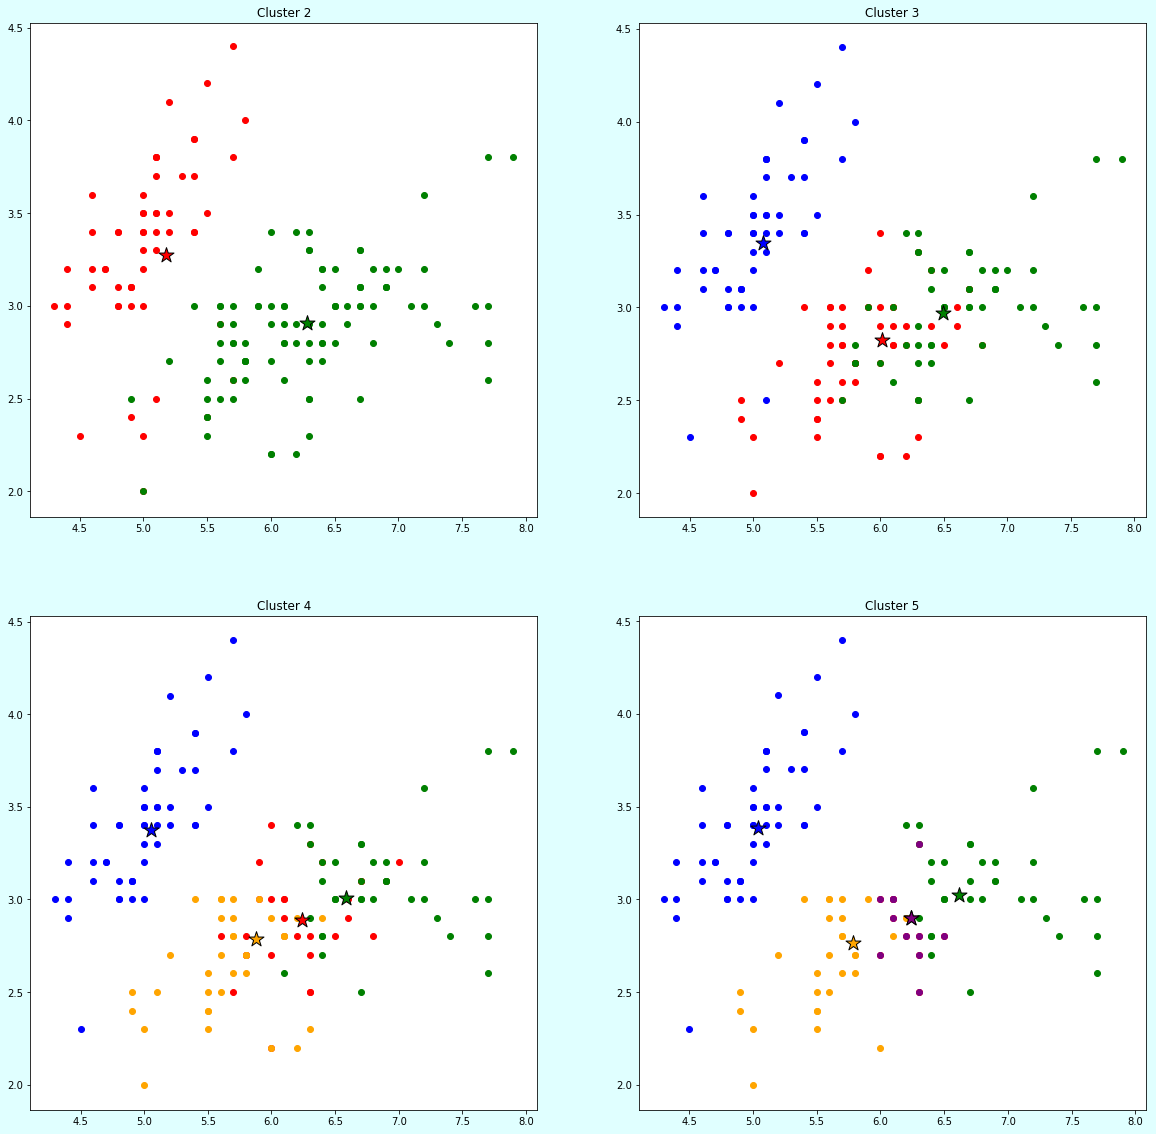

In [8]:
fig = plt.figure(figsize=(20,20))
fig.patch.set_facecolor('lightcyan')

ax = fig.subplots(2,2)

# Cluster 2
fcm = FCM(n_clusters=2,init='k-means++',random_state=10,fuzzy_coef_m=2,tol=1e-10)
labels = fcm.fit_predict(X)
ax[0,0].scatter(X[labels[:,0]>0.4,0],X[labels[:,0]>0.4,1],c='r')
ax[0,0].scatter(X[labels[:,1]>0.4,0],X[labels[:,1]>0.4,1],c='g')
ax[0,0].scatter(fcm.centroid[0,0],fcm.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[0,0].scatter(fcm.centroid[1,0],fcm.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[0,0].set_title('Cluster 2')

# Cluster 3
fcm = FCM(n_clusters=3,init='k-means++',random_state=10,fuzzy_coef_m=2,tol=1e-10)
labels = fcm.fit_predict(X)
ax[0,1].scatter(X[labels[:,0]>0.4,0],X[labels[:,0]>0.4,1],c='r')
ax[0,1].scatter(X[labels[:,1]>0.4,0],X[labels[:,1]>0.4,1],c='g')
ax[0,1].scatter(X[labels[:,2]>0.4,0],X[labels[:,2]>0.4,1],c='b')
ax[0,1].scatter(fcm.centroid[0,0],fcm.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[0,1].scatter(fcm.centroid[1,0],fcm.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[0,1].scatter(fcm.centroid[2,0],fcm.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[0,1].set_title('Cluster 3')

# Cluster 4
fcm = FCM(n_clusters=4,init='k-means++',random_state=10,fuzzy_coef_m=2,tol=1e-10)
labels = fcm.fit_predict(X)
ax[1,0].scatter(X[labels[:,0]>0.4,0],X[labels[:,0]>0.4,1],c='r')
ax[1,0].scatter(X[labels[:,1]>0.4,0],X[labels[:,1]>0.4,1],c='g')
ax[1,0].scatter(X[labels[:,2]>0.4,0],X[labels[:,2]>0.4,1],c='b')
ax[1,0].scatter(X[labels[:,3]>0.4,0],X[labels[:,3]>0.4,1],c='orange')
ax[1,0].scatter(fcm.centroid[0,0],fcm.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[1,0].scatter(fcm.centroid[1,0],fcm.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[1,0].scatter(fcm.centroid[2,0],fcm.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[1,0].scatter(fcm.centroid[3,0],fcm.centroid[3,1],s=250,c='orange',marker='*',edgecolors='k')
ax[1,0].set_title('Cluster 4')

# Cluster 5
fcm = FCM(n_clusters=5,init='k-means++',random_state=10,fuzzy_coef_m=2,tol=1e-10)
labels = fcm.fit_predict(X)
ax[1,1].scatter(X[labels[:,0]>0.4,0],X[labels[:,0]>0.4,1],c='r')
ax[1,1].scatter(X[labels[:,1]>0.4,0],X[labels[:,1]>0.4,1],c='g')
ax[1,1].scatter(X[labels[:,2]>0.4,0],X[labels[:,2]>0.4,1],c='b')
ax[1,1].scatter(X[labels[:,3]>0.4,0],X[labels[:,3]>0.4,1],c='orange')
ax[1,1].scatter(X[labels[:,4]>0.4,0],X[labels[:,4]>0.4,1],c='purple')
ax[1,1].scatter(fcm.centroid[0,0],fcm.centroid[0,1],s=250,c='r',marker='*',edgecolors='k')
ax[1,1].scatter(fcm.centroid[1,0],fcm.centroid[1,1],s=250,c='g',marker='*',edgecolors='k')
ax[1,1].scatter(fcm.centroid[2,0],fcm.centroid[2,1],s=250,c='b',marker='*',edgecolors='k')
ax[1,1].scatter(fcm.centroid[3,0],fcm.centroid[3,1],s=250,c='orange',marker='*',edgecolors='k')
ax[1,1].scatter(fcm.centroid[4,0],fcm.centroid[4,1],s=250,c='purple',marker='*',edgecolors='k')
ax[1,1].set_title('Cluster 5')


In [9]:
print(labels)

[[3.89323473e-03 2.72875373e-03 9.83457940e-01 6.02682571e-03
  3.89324621e-03]
 [1.28703270e-02 8.93405766e-03 9.44855526e-01 2.04697248e-02
  1.28703650e-02]
 [1.34467886e-02 9.47966253e-03 9.42725695e-01 2.09010276e-02
  1.34468265e-02]
 [1.71418203e-02 1.19176418e-02 9.26474977e-01 2.73236902e-02
  1.71418705e-02]
 [5.72138133e-03 4.02946631e-03 9.75729271e-01 8.79848316e-03
  5.72139797e-03]
 [2.91049567e-02 2.01687146e-02 8.76726045e-01 4.48952346e-02
  2.91050491e-02]
 [1.32236207e-02 9.30667881e-03 9.43653967e-01 2.05920746e-02
  1.32236585e-02]
 [1.18474480e-03 8.22208592e-04 9.94938582e-01 1.86971632e-03
  1.18474836e-03]
 [3.44971331e-02 2.42404584e-02 8.52444838e-01 5.43203408e-02
  3.44972299e-02]
 [9.20532386e-03 6.36913696e-03 9.60525410e-01 1.46947782e-02
  9.20535135e-03]
 [1.62117526e-02 1.13511230e-02 9.31416615e-01 2.48087076e-02
  1.62118017e-02]
 [4.45075026e-03 3.07749009e-03 9.80924490e-01 7.09650624e-03
  4.45076371e-03]
 [1.61023212e-02 1.12316021e-02 9.311058

In [10]:
print(np.sum(labels,1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


### Observation
- kmean과 유사하지만 조금더 noise 하게 결과가 나왔다.
- hard clustering과 다르게 label 변수에 지정된 것처럼 각 sample별로 각 cluster에 해당할 확률 값을 알 수 있으며, 
- 이들의 합이 1이 됨을 np.sum 함수의 결과값을 통해서 알 수 있다.